In [25]:
import pandas as pd
import numpy as np
import itertools as it
from requests import get
from bs4 import BeautifulSoup as bs4
from time import sleep, time
from random import randint

startTime = time()

csvs = ['books', 'clothing', 'collectables', 'healthbeauty', 'homegarden', 'iphones', 'music', 'sporting']
users = []
for csv in csvs:
    csv = pd.read_csv(csv + '.csv')

    users = []
    for index in csv.index:
        users.append(csv.loc[index][' seller'])
    users = list(dict.fromkeys(users))
users.pop(0)

feedback_lists = []
ratings_lists = []
feedback_descriptions = []
user_fault = []
for user in users:
    #sleep(randint(1,3))
    print(user, "Elapsed Time: ", time()-startTime)
    request = get('https://feedback.ebay.com/ws/eBayISAPI.dll?ViewFeedback2&userid=' + str(user))
    page_html = bs4(request.text, 'html.parser')
    
    try:
        feedback_table=page_html.find('div', class_='CentralArea').find('table', {'id':'recentFeedbackRatingsTable'})
        
    except:
        print("Top Seller")
        user_fault.append(user)
        continue
    try:
        rows = feedback_table.find_all('tr', class_='fbsSmallYukon')
    except:
        print("Top Seller")
        user_fault.append(user)
        continue

    feedback_row = []
    for row in rows:
        feedback = row.find_all('td', {'id':'RFRId'})
        feedback_row.append(feedback)

    positive = []
    neutral = []
    negative = []
    count = 0
    while count < 3:
        one_month = ''
        six_month = ''
        twelve_month = ''

        try:
            one_month = feedback_row[count][0].a.text
        except:
            # It's a span instead of a and just ends up outputting 0 basically means no feedback
            one_month = '0'

        try:
            six_month = feedback_row[count][1].a.text
        except:
            six_month = '0'

        try:
            twelve_month = feedback_row[count][2].a.text
        except:
            twelve_month = '0'

        if count == 0:
            positive.append(one_month)
            positive.append(six_month)
            positive.append(twelve_month)
        elif count == 1:
            neutral.append(one_month)
            neutral.append(six_month)
            neutral.append(twelve_month)
        elif count == 2:
            negative.append(one_month)
            negative.append(six_month)
            negative.append(twelve_month)


        count = count + 1

    #df = pd.DataFrame(np.array([positive, neutral, negative]), index=['Positive', 'Neutral', 'Negative'], columns=['1 Month', '6 Months', '12 Months'])
    #df
    feedback_list = positive + neutral + negative
    feedback_lists.append(feedback_list)
    #df = pd.DataFrame(feedback_list, columns=[user],
    #                  index=['Positive 1 Month', 'Positive 6 Month', 'Positive 12 Month',
    #                        'Neutral 1 Month', 'Neutral 6 Month', 'Neutral 12 Month',
    #                        'Negative 1 Month', 'Negative 6 Month', 'Negative 12 Month'])
    #df
    
    detailed_table = page_html.find('div', class_='CentralArea').find('div', class_='dsrRatingContent')
    try:
        rows = detailed_table.find_all('tr', class_='dsrRatingContentPadding')
        row_criterias = []
        row_ratings = []
        row_number_of_ratings = []
        for i in range(len(rows)):
            row_details = rows[i].find_all('td')
            row_criterias.append(row_details[0].text)
            row_ratings.append(row_details[1]['title'])
            row_number_of_ratings.append(row_details[2].text)
            #print(row_criteria, row_rating, row_number_of_ratings)

        ratings_list = [item for pair in zip(row_ratings, row_number_of_ratings + [0]) for item in pair]
        #print(ratings_list)
        #df2 = pd.DataFrame(ratings_list, index=['Item Described Rating', '# Item Described Ratings', 
        #                                        'Communication Rating', '# Communication Ratings',
        #                                       'Shipping Time Rating', '# Shipping Time Ratings',
        #                                       'Shipping and Handling Charges Rating', '# Shipping and Handling Charges Rating'],
        #                                  columns=[user])
        ratings_lists.append(ratings_list)
    except:
        l = [None] * 8
        ratings_lists.append(l)

    
    
    feedback_table_detail = page_html.find('table', class_='FbOuterYukon')
    try:
        seller_feedback = feedback_table_detail.find_all('tr', class_='')
    except:
        l = ['Private Feedback'] * 5
        feedback_descriptions.append(l)
        continue

    #feedback_rating = []
    feedback_description = []
    count = 0
    while count < 5:
        #feedback_rating.append(seller_feedback[count].find_all('td')[0].img['alt'].split(' ')[0])
        try:
            feedback_description.append(seller_feedback[count].find_all('td')[1].text)
        except:
            feedback_description.append('N/A')
        count += 1
    feedback_descriptions.append(feedback_description)

    #df4 = pd.DataFrame(index=['Description 1', 'Description 2', 'Description 3', 'Description 4', 'Description 5'], columns=[user], index=feedback_rating)
    #df5 = pd.concat([df3, df4])

tolam61 Elapsed Time:  12.90427279472351
thecampsaver Elapsed Time:  13.43277096748352
antiquedredger Elapsed Time:  13.963137865066528
brach-5390 Elapsed Time:  14.961080074310303
webyshops Elapsed Time:  15.453617811203003
poor_fish Elapsed Time:  15.951596975326538
starshop*2012 Elapsed Time:  16.526968955993652
survivorman626 Elapsed Time:  17.12766695022583
marleon3 Elapsed Time:  17.647990942001343
bigfishjap1 Elapsed Time:  18.141064882278442
jason227 Elapsed Time:  18.728477954864502
jotel5046 Elapsed Time:  19.22068977355957
unnamen_22 Elapsed Time:  19.669440984725952
9deuce Elapsed Time:  20.081210136413574
id4shoes Elapsed Time:  20.511772871017456
plateros777 Elapsed Time:  21.134588718414307
australian-vintage-records Elapsed Time:  21.740518808364868
bikeriders96 Elapsed Time:  22.359079837799072
Backcountry Elapsed Time:  22.767016887664795
backcountry Elapsed Time:  23.18212604522705
chalkbox Elapsed Time:  23.687262773513794
Top Seller
egshop2019 Elapsed Time:  24.501

In [58]:
feedback_list_index = ['Positive 1 Month', 'Positive 6 Month', 'Positive 12 Month',
                            'Neutral 1 Month', 'Neutral 6 Month', 'Neutral 12 Month',
                            'Negative 1 Month', 'Negative 6 Month', 'Negative 12 Month']

ratings_list_index = ['Item Described Rating', '# Item Described Ratings', 
                                                'Communication Rating', '# Communication Ratings',
                                               'Shipping Time Rating', '# Shipping Time Ratings',
                                               'Shipping and Handling Charges Rating', '# Shipping and Handling Charges Rating']
feedback_detail_index = ['Description 1', 'Description 2', 'Description 3', 'Description 4', 'Description 5']

index_combined = feedback_list_index + ratings_list_index + feedback_detail_index

user_lists = []
for i in range(len(feedback_lists)):
    fl = list(np.array(feedback_lists[i]).flatten())
    rl = list(np.array(ratings_lists[i]).flatten())
    fd = list(np.array(feedback_descriptions[i]).flatten())
    user_lists.append(fl+rl+fd)
for user in user_fault:
    if user in users:
        users.remove(user)
df = pd.DataFrame(user_lists, index=users, columns=index_combined).transpose()
df.to_csv('user-feedback.csv')
df2 = df.transpose()
df2

,Positive 1 Month,Positive 6 Month,Positive 12 Month,Neutral 1 Month,Neutral 6 Month,Neutral 12 Month,Negative 1 Month,Negative 6 Month,Negative 12 Month,Item Described Rating,...,# Communication Ratings,Shipping Time Rating,# Shipping Time Ratings,Shipping and Handling Charges Rating,# Shipping and Handling Charges Rating,Description 1,Description 2,Description 3,Description 4,Description 5
tolam61,0,0,0,0,0,0,0,0,0,None,...,None,None,None,None,None,N/A,N/A,N/A,N/A,N/A
thecampsaver,39,294,479,1,3,3,0,3,6,4.9 / 5.0,...,456,5.0 / 5.0,461,4.9 / 5.0,454,Just as described!,Product arrived six days early and in excellen...,was miss lead thought it was for 5 items was o...,Perfect!,Exactly what we were looking for. Thanks for ...
antiquedredger,1,1,1,0,0,0,1,1,1,None,...,None,None,None,None,None,Reply by antiquedredger (Dec-08-19 10:08):Expe...,"Thank you for an easy, pleasant transaction. E...",N/A,Hope to deal with you again. Thank you.,"Great Buyer, fast payment, please come back an..."
brach-5390,0,0,0,0,0,0,0,0,0,None,...,None,None,None,None,None,N/A,N/A,N/A,N/A,N/A
webyshops,402,2184,5800,0,6,21,3,18,54,4.9 / 5.0,...,5171,5.0 / 5.0,5211,5.0 / 5.0,5331,"As advertised, Thank you. A+",Fast shipping and was in perfect shape just as...,"Great dealer Fast ship time,will buy from aga...",Great Product Thanks....,Great seller!! Thank you!!!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ronmel1616,85,403,823,1,2,4,4,5,6,4.9 / 5.0,...,721,5.0 / 5.0,748,5.0 / 5.0,749,"Good item at a good price. Quick to ship, woul...",Good seller,"Excellent seller, great to work with. Had to r...",A++++Very satisfied!!\n\n,"Quick shipping, thanks."
smb50gp,76,292,546,0,0,0,0,0,0,5.0 / 5.0,...,458,5.0 / 5.0,468,5.0 / 5.0,467,A++++Seller,Thank You ....,Merchandise as described. Prompt shipping.,"A+A+A+...Thank you very much, pleasure doing b...",Good seller! Would deal with again.
countrysportman,264,2349,6588,0,5,15,0,3,4,5.0 / 5.0,...,4608,5.0 / 5.0,4667,5.0 / 5.0,4709,Great Ebayer,Great item great seller great service the best,"Smooth transaction.Great experience ,I will do...",Excellent seller highly recommend,Item as described
open_box_sports,397,2556,6300,4,26,83,14,57,119,4.9 / 5.0,...,5285,4.8 / 5.0,5414,4.8 / 5.0,5363,"Just as described, very friendly & Fast shippi...",Ebay seller sucks. Listed antenna but sent me ...,Thank you.,"Just as described, very friendly & Fast shippi...",Thank you!


In [86]:
import subprocess
import json
import re

user_value_totals = []
user_columns = []
for i in range(len(df2)):
    sadness_vals = []
    joy_vals = []
    fear_vals = []
    disgust_vals = []
    anger_vals = []
    for j in range(1, 6):
        with open('parameters.json', 'r') as f:
            json_data = json.load(f)
            json_text = df2.iloc[i]["Description {0}".format(j)].replace("'", "")
            if json_text == "N/A":
                #print(['0.0', '0.0', '0.0', '0.0', '0.0'])
                continue
            json_data['text'] = json_text
        with open('parameters.json', 'w') as f:
            f.write(json.dumps(json_data))

        rc = subprocess.check_output("./ibm.sh").decode("utf-8")
        rc = list(filter(None, rc.replace("\"", "").replace("'", "").replace(" ", "").replace(",","").replace("{","").replace("}", "").split('\n')))[-5:]
        if len(rc) != 5:
            rc = ['0.0', '0.0', '0.0', '0.0', '0.0']
        else:
            rc[0] = rc[0].replace("sadness:", "")
            rc[1] = rc[1].replace("joy:", "")
            rc[2] = rc[2].replace("fear:", "")
            rc[3] = rc[3].replace("disgust:", "")
            rc[4] = rc[4].replace("anger:", "")
        rc = np.float_(rc)

        sadness_vals.append(rc[0])
        joy_vals.append(rc[1])
        fear_vals.append(rc[2])
        disgust_vals.append(rc[3])
        anger_vals.append(rc[4])

    value_totals = []
    value_totals.append(np.sum(sadness_vals))
    value_totals.append(np.sum(joy_vals))
    value_totals.append(np.sum(fear_vals))
    value_totals.append(np.sum(disgust_vals))
    value_totals.append(np.sum(anger_vals))
    user_value_totals.append(value_totals)
    user_columns.append(df2.iloc[i].name)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [118]:
value_index = ["Sadness Feedback Value", "Joy Feedback Value", "Fear Feedback Value", "Disgust Feedback Value", "Anger Feedback Value"]
df5 = pd.DataFrame(user_value_totals, columns=value_index, index=user_columns).transpose()

In [119]:
df5

,tolam61,thecampsaver,antiquedredger,brach-5390,webyshops,poor_fish,starshop*2012,survivorman626,marleon3,bigfishjap1,...,grerena-0,kpeters5326,prosportsfc,torysvintagesleds,nhlamth_0,ronmel1616,smb50gp,countrysportman,open_box_sports,efc3
Sadness Feedback Value,0.0,0.852240,0.192720,0.0,0.307174,0.171584,0.158505,0.050036,0.0,0.033069,...,0.351220,0.015215,0.929884,0.239207,0.101157,0.230270,0.395693,0.406050,0.562151,0.241542
Joy Feedback Value,0.0,1.246692,1.784899,0.0,3.317717,1.654841,3.414540,2.808841,0.0,2.020570,...,1.816056,3.837940,1.071131,3.360648,0.193272,2.541046,1.478653,2.988896,0.286569,2.454483
Fear Feedback Value,0.0,0.134481,0.125054,0.0,0.081979,0.066654,0.029725,0.027002,0.0,0.058682,...,0.370410,0.019350,0.091391,0.120802,0.004470,0.015751,0.071457,0.051687,0.113624,0.073789
Disgust Feedback Value,0.0,0.042173,0.035373,0.0,0.069377,0.020155,0.001875,0.014143,0.0,0.051946,...,0.151397,0.040915,0.099156,0.040142,0.011342,0.023615,0.066600,0.066382,0.062330,0.015998
Anger Feedback Value,0.0,0.113092,0.108437,0.0,0.107141,0.035935,0.029065,0.036603,0.0,0.078292,...,0.196345,0.064360,0.148992,0.087548,0.037828,0.052697,0.196018,0.089771,0.424312,0.057538


In [120]:
pd.concat([df, df5])

,tolam61,thecampsaver,antiquedredger,brach-5390,webyshops,poor_fish,starshop*2012,survivorman626,marleon3,bigfishjap1,...,grerena-0,kpeters5326,prosportsfc,torysvintagesleds,nhlamth_0,ronmel1616,smb50gp,countrysportman,open_box_sports,efc3
Positive 1 Month,0,39,1,0,402,153,105,6,0,3,...,4,60,7,8,1,85,76,264,397,23
Positive 6 Month,0,294,1,0,2184,1357,628,56,0,3,...,38,328,30,44,1,403,292,2349,2556,94
Positive 12 Month,0,479,1,0,5800,2076,1610,106,0,3,...,70,511,88,93,1,823,546,6588,6300,118
Neutral 1 Month,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4,0
Neutral 6 Month,0,3,0,0,6,5,5,0,0,0,...,0,0,1,0,0,2,0,5,26,0
Neutral 12 Month,0,3,0,0,21,6,10,0,0,0,...,0,0,1,0,0,4,0,15,83,0
Negative 1 Month,0,0,1,0,3,0,1,0,0,0,...,0,0,1,0,0,4,0,0,14,0
Negative 6 Month,0,3,1,0,18,2,7,0,0,0,...,0,0,4,0,0,5,0,3,57,2
Negative 12 Month,0,6,1,0,54,4,16,0,0,0,...,0,0,4,0,0,6,0,4,119,2
Item Described Rating,None,4.9 / 5.0,None,None,4.9 / 5.0,5.0 / 5.0,4.9 / 5.0,4.8 / 5.0,None,None,...,None,5.0 / 5.0,4.6 / 5.0,4.9 / 5.0,None,4.9 / 5.0,5.0 / 5.0,5.0 / 5.0,4.9 / 5.0,4.9 / 5.0


Text(0.5, 1.0, 'Feedback Emotion Types')

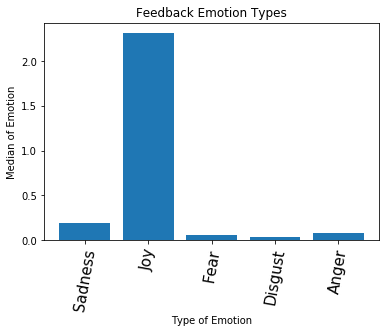

In [148]:
import matplotlib.pyplot as plt

sadness_median = df5.iloc[0].median(axis=0)
joy_median = df5.iloc[1].median(axis=0)
fear_median = df5.iloc[2].median(axis=0)
disgust_median = df5.iloc[3].median(axis=0)
anger_median = df5.iloc[4].median(axis=0)

medians = [sadness_median, joy_median, fear_median, disgust_median, anger_median]
emotions = ["Sadness", "Joy", "Fear", "Disgust", "Anger"]
index = np.arange(len(medians))
plt.bar(index, medians)
plt.xticks(index, emotions, fontsize=15, rotation=80)
plt.ylabel("Median of Emotion")
plt.xlabel("Type of Emotion")
plt.title("Feedback Emotion Types")